<a href="https://colab.research.google.com/github/LiamThomassen/Human_Network_Analysis/blob/main/HNA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load packages
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#Flatten Data
x_train_flat = x_train.reshape([60000,784])
x_test_flat = x_test.reshape([10000,784])

In [ ]:
#Check if dimensions are correct
print(x_train_flat.shape, x_test_flat.shape)

(60000, 784) (10000, 784)


In [ ]:
#Rescale data
x_train_RF = np.divide(x_train_flat,255)
x_test_RF = np.divide(x_test_flat,255)

In [ ]:
#Turn Y into categorical values
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
y_test_cat[1:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [ ]:
history = model.fit(x_train_RF, y_train_cat, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2448 - accuracy: 0.9313 - val_loss: 0.2866 - val_accuracy: 0.9251
Epoch 2/12
375/375 [==============================] - 3s 9ms/step - loss: 0.2428 - accuracy: 0.9319 - val_loss: 0.2877 - val_accuracy: 0.9237
Epoch 3/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2433 - accuracy: 0.9320 - val_loss: 0.2867 - val_accuracy: 0.9237
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2426 - accuracy: 0.9320 - val_loss: 0.2800 - val_accuracy: 0.9248
Epoch 5/12
375/375 [==============================] - 2s 7ms/step - loss: 0.2428 - accuracy: 0.9328 - val_loss: 0.2794 - val_accuracy: 0.9270
Epoch 6/12
375/375 [==============================] - 2s 7ms/step - loss: 0.2418 - accuracy: 0.9320 - val_loss: 0.2945 - val_accuracy: 0.9227
Epoch 7/12
375/375 [==============================] - 4s 9ms/step - loss: 0.2419 - accuracy: 0.9313 - val_loss: 0.2845 - val_accuracy: 0.9238
Epoch 

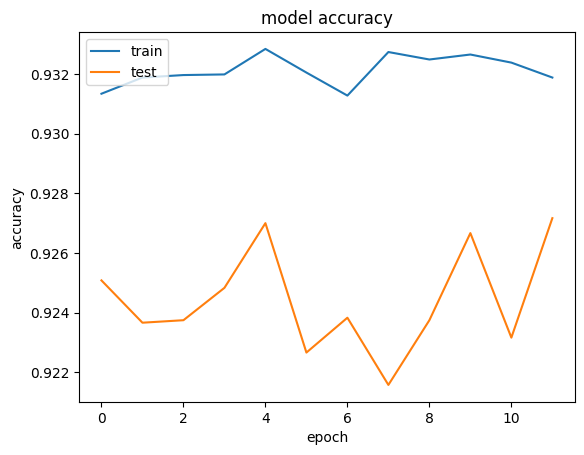

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

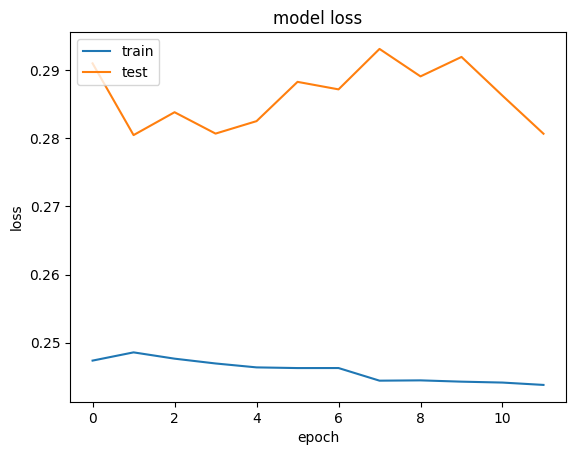

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(x_test_RF, y_test_cat, verbose=0)

In [ ]:
print(loss, accuracy)

0.29102662205696106 0.9226999878883362


In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(256, input_shape=(784,), activation='relu'))
model2.add(keras.layers.Dense(10,activation='softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history2 = model2.fit(x_train_RF, y_train_cat, batch_size=128,
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 3s 8ms/step - loss: 0.3241 - accuracy: 0.9091 - val_loss: 0.1880 - val_accuracy: 0.9440
Epoch 2/12
375/375 [==============================] - 3s 7ms/step - loss: 0.1483 - accuracy: 0.9570 - val_loss: 0.1309 - val_accuracy: 0.9618
Epoch 3/12
375/375 [==============================] - 3s 8ms/step - loss: 0.1024 - accuracy: 0.9707 - val_loss: 0.1104 - val_accuracy: 0.9678
Epoch 4/12
375/375 [==============================] - 3s 8ms/step - loss: 0.0764 - accuracy: 0.9778 - val_loss: 0.0899 - val_accuracy: 0.9741
Epoch 5/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0591 - accuracy: 0.9826 - val_loss: 0.0906 - val_accuracy: 0.9734
Epoch 6/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.0840 - val_accuracy: 0.9753
Epoch 7/12
375/375 [==============================] - 3s 7ms/step - loss: 0.0382 - accuracy: 0.9890 - val_loss: 0.0776 - val_accuracy: 0.9771
Epoch 

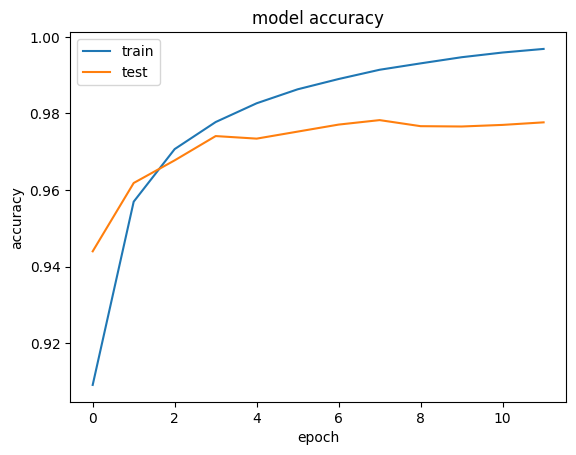

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

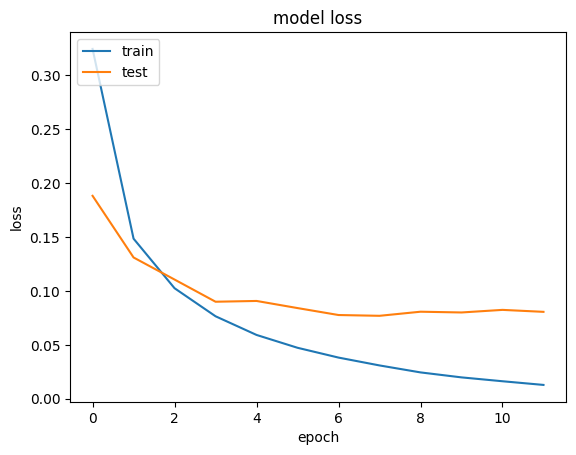

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###reshape data for Convolutional model


In [ ]:
x_train_cn = x_train.reshape([60000,28,28,1])
x_test_cn = x_test.reshape([10000,28,28,1])
x_train_cn = np.divide(x_train_cn,255)
x_testt_cn = np.divide(x_test_cn,255)

##Train and test Convolutional model

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
#model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
#model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
#Runs for +-12min
model.compile(loss='categorical_crossentropy',
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
history3 = model.fit(x_train_cn, y_train_cat, batch_size=128,
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 113s 297ms/step - loss: 0.1936 - accuracy: 0.9399 - val_loss: 0.0739 - val_accuracy: 0.9781
Epoch 2/6
375/375 [==============================] - 115s 308ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 3/6
375/375 [==============================] - 111s 297ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0616 - val_accuracy: 0.9837
Epoch 4/6
375/375 [==============================] - 113s 302ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0479 - val_accuracy: 0.9869
Epoch 5/6
375/375 [==============================] - 114s 305ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0509 - val_accuracy: 0.9883
Epoch 6/6
375/375 [==============================] - 113s 302ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0533 - val_accuracy: 0.9872


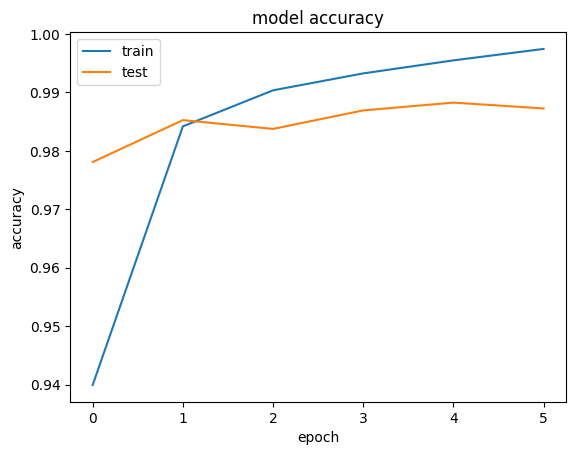

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

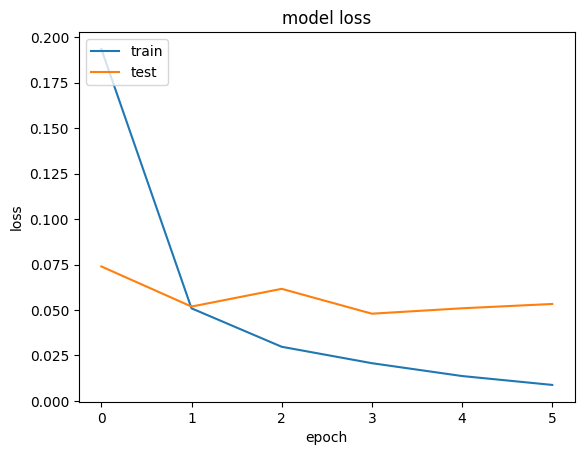

In [ ]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Adding dropout to the convolutional model

In [ ]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(rate=0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [ ]:
history4 = model.fit(x_train_cn, y_train_cat, batch_size=128,
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 115s 304ms/step - loss: 0.2778 - accuracy: 0.9151 - val_loss: 0.0649 - val_accuracy: 0.9809
Epoch 2/6
375/375 [==============================] - 113s 301ms/step - loss: 0.0954 - accuracy: 0.9718 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 3/6
375/375 [==============================] - 114s 305ms/step - loss: 0.0703 - accuracy: 0.9795 - val_loss: 0.0439 - val_accuracy: 0.9864
Epoch 4/6
375/375 [==============================] - 113s 302ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0385 - val_accuracy: 0.9879
Epoch 5/6
375/375 [==============================] - 112s 299ms/step - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0416 - val_accuracy: 0.9881
Epoch 6/6
375/375 [==============================] - 109s 292ms/step - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.0355 - val_accuracy: 0.9897


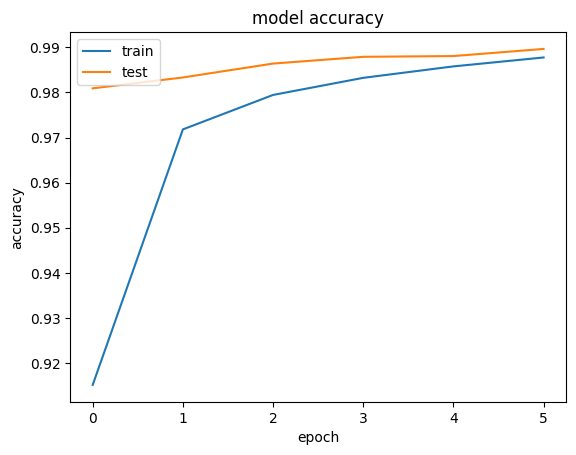

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

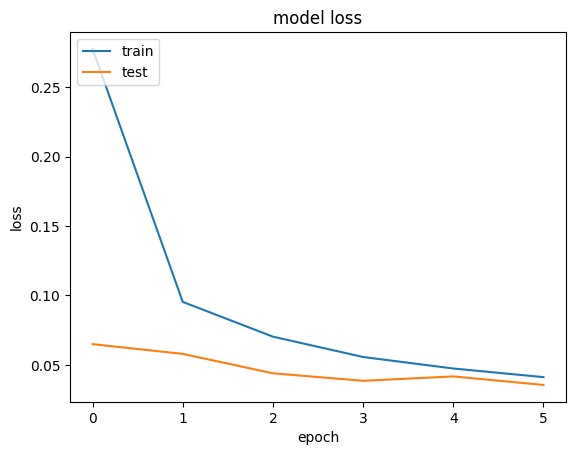

In [ ]:
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##Exercise 2
Questions 8-13 can be completed with the following low-level functions and
operations only:
- =, >, <, +, -, /, *, @ (@ is matrix multiplication, np.matmul is similar)
- reshape (this is very useful)
- np.zeros (to pre-define arrays)
- np.sum
- np.maximum
- np.shape
- np.tile or np.repeat
- np.array
- np.mean
- np.std
- np.dot
- np.exp
- len
- range
- int
- for

###Question 8
Write a simple function that achieves the convolution operation efficiently for two-
dimensional and three-dimensional inputs. This should allow you to input a set of
convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image)
as inputs. The input layer should have a third dimension, representing a stack of
feature maps, and each filter should have a third dimension of corresponding size.
The function should output a number of two-dimensional feature maps
corresponding to the number of input filters, though these can be stacked into a third
dimensional like the input layer

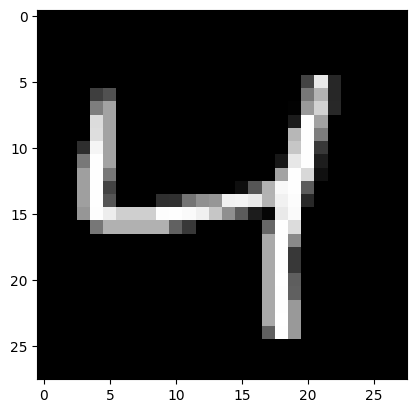

In [ ]:
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [ ]:
def convolution(image,kernel):
  #kernel = [[-1,0,1],
  #          [-2,0,2],
  #          [-1,0,1]]
  #add 0 around the image
  padded_image = np.pad(image,1,mode="constant")
  #Allocate memory for the output
  output = np.zeros((28,28))
  for i in range(len(image[0])):
    for j in range(len(image[1])):
      square = [[padded_image[i][j],padded_image[i+1][j],padded_image[i+2][j]],
                [padded_image[i][j+1],padded_image[i+1][j+1],padded_image[i+2][j+1]],
                [padded_image[i][j+2],padded_image[i+1][j+2],padded_image[i+2][j+2]]]
      output[i][j] = np.sum(np.multiply(kernel,square))

  return output

In [ ]:
kernel = [[-1,0,1],
            [-2,0,2],
            [-1,0,1]]
kernel2 = [[-1,-2,-1],
            [0,0,0],
            [1,2,1]]

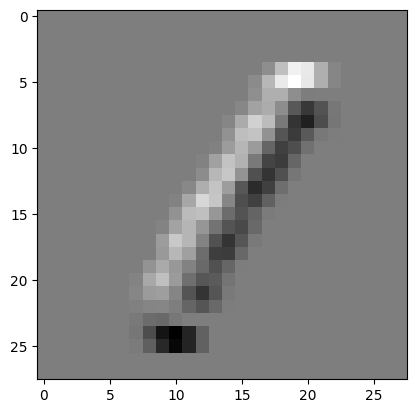

In [ ]:
x = convolution(x_train[3],kernel)
plt.imshow(x, cmap = "gray")
plt.show()